## [06] 피마 인디언 당뇨병 예측 

피마 인디언 당뇨병 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고, 평가지표를 적용.

피마 인디언 당뇨병 데이터 세트는 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터

 - pregnancies : 임신 횟수
 - glucose : 포도당 부하 검사 수치
 - BloodPressure : 혈압
 - skinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
 - Insulin : 혈청 인슐린
 - BMI : 체질량 지수
 - DiabetesPedigreeFunction : 당뇨 내력 가중치 값
 - Age : 나이
 - Outcome : 클래스 결정 값 (0또는 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


C:\Users\june0\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
diabetes_data = pd.read_csv('C:/data/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


null값은 없으며 피처의 타입은 모두 숫자형.

 - 로지스틱 회귀를 이용해 예측모델을 생성
 
 : 데이터 세트를 피처 데이터 세트와 클래스 데이터 세트로 나누고 학습 데이터 세트와 테스트 데이터 세트로 분리.
 
 : 로지스틱 회귀를 이용해 예측을 수행하고 성능 평가 지표를 출력하고 재현율 곡선을 시각화.

In [9]:
#피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
#맨끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1을 이용해 추출.
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=156, stratify=y)

#get_clf_eval 정의
def get_clf_eval(y_test,pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f}, 재현율:{2:.4f},F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall,f1, roc_auc))
    
#로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도:0.7727,정밀도:0.7209, 재현율:0.5741,F1 : 0.6392, AUC:0.7919


C:\Users\june0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


전체 데이터의 65%가 negative이므로 정확도보다는 재현율 성능에 조금 더 초점을 맞춤.

정밀도 재현율 곡선을 보고 임곗값별 정밀도와 재현율 값의 변화를 확인.

In [11]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary], linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')

    #threshold 값 x 축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    #x축,y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()

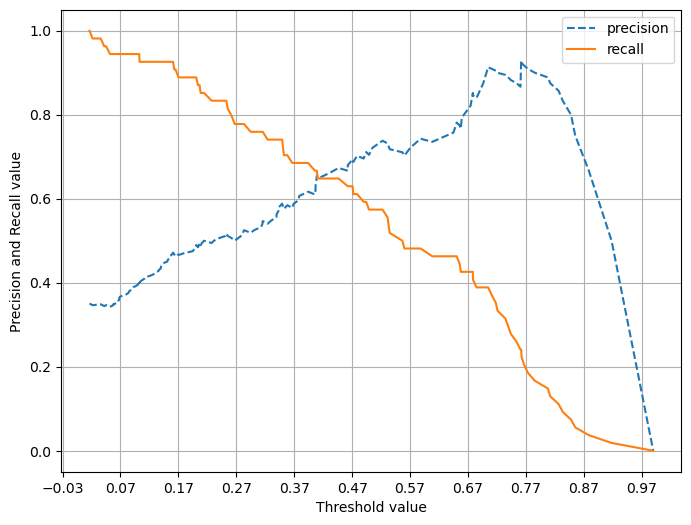

In [12]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

재현율 곡선을 보면 임곗값을 0.42 정도로 낮추면 정밀도와 재현율이 어느 정도 균형을 맞출 수 있어 보임. 

두개의 지표 모두 0.7이 안되는 수치로 보임. 여전히 두 지표의 값이 낮음. 

In [13]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

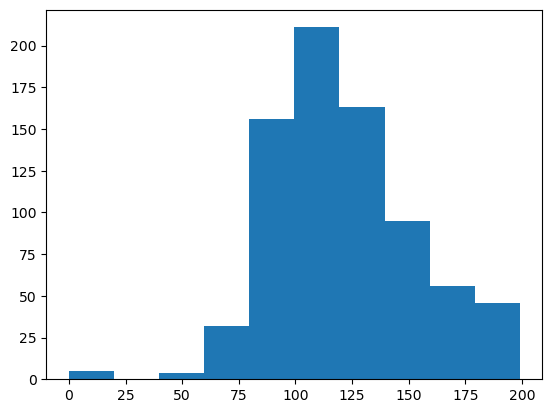

In [14]:
plt.hist(diabetes_data['Glucose'], bins=10)

min()값이 0으로 되어 있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인.

'Glucose','BloodPressure','SkinThickness','Insulin','BMI'

In [16]:
#0값을 겁사할 피처 명 리스트
zero_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

#전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

#피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature]==0][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature,zero_count, 100*zero_count/total_count))

Glucose 건수는 5, 퍼센트는 0.65%
BloodPressure 건수는 35, 퍼센트는 4.56%
SkinThickness 건수는 227, 퍼센트는 29.56%
Insulin 건수는 374, 퍼센트는 48.70%
BMI 건수는 11, 퍼센트는 1.43%


Skinthickness와 Insulin의 0값은 전체에서 많은 편이기 때문에 피처의 0값을 평균값으로 대체.

In [17]:
#zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]= diabetes_data[zero_features].replace(0,mean_zero_features)

피처 스케일링을 적용해 변환.

In [19]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

#StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도:0.7987,정밀도:0.7674, 재현율:0.6111,F1 : 0.6804, AUC:0.8433


 - 분류 결정 임곗값을 변화시키면서 재현율 값의 성능 수치가 어느 정도나 개선되었는지 확인

In [32]:
from sklearn.preprocessing import Binarizer

def get_clf_eval(y_test,pred, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f},정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

def get_eval_by_threshold(y_test,pred_proba_c1,threshold):
  #thresholds list객체 내의 값을 차례로 iteration하면서 Evlauation 수행.
  for custom_threshold in thresholds:
    binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
    custom_predict = binarizer.transform(pred_proba_c1)
    print('임곗값:',custom_threshold)
    get_clf_eval(y_test,custom_predict)

In [33]:
thresholds = [0.3,0.33,0.36,0.39,0.42,0.45,0.48,0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도:0.7143,정밀도:0.5658, 재현율:0.7963
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도:0.7403,정밀도:0.6000, 재현율:0.7778
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도:0.7468,정밀도:0.6190, 재현율:0.7222
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도:0.7532,정밀도:0.6333, 재현율:0.7037
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도:0.7792,정밀도:0.6923, 재현율:0.6667
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도:0.7857,정밀도:0.7059, 재현율:0.6667
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도:0.7987,정밀도:0.7447, 재현율:0.6481
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도:0.7987,정밀도:0.7674, 재현율:0.6111


정확도와 정밀도를 희생하고 재현율을 높이는 데 가장 좋은 임곗값은 0.33으로 재현율 값이 0.7963임. 하지만 정밀도가 0.5972로 매우 저조.

임곘값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임곗값.

 - 앞에서 학습된 로지스틱 회귀 모델을 이용해 임곗값을 0.48로 낮룬 상태에서 다시 예측.

In [34]:
# 임곗값을 0.48로 설정한 binarizer 설정
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba()예측 확률 array에서 1에 해당 칼럼값을 binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도:0.7987,정밀도:0.7447, 재현율:0.6481
